# 1. Strided Convolution

- Strided Convolution
  - Downsample the spatial resolution of feature maps by controling the step size of kernels
  - 'stride': the step size that convolutional kernel moving over the input data
     - Stride value: Usually set to be greater than '1'

## 1.1. Basic 1

### Preparation

In [1]:
# Import modules
import matplotlib.pyplot as plt
import torch
import torch.nn as nn


### Generate Data

In [2]:
# Generate data
input_data = torch.randn(1,      # Batch size
                         1,      # Number of Channel
                         28, 28) # Size of images
print(input_data)

tensor([[[[ 5.1439e-01,  1.6758e+00, -1.2862e+00,  6.1748e-01, -5.0353e-01,
           -1.0120e+00, -9.6447e-01, -5.1829e-01, -2.1589e+00,  6.2197e-01,
            1.0492e+00, -4.6363e-01,  1.9006e+00,  1.0136e+00, -3.9384e-01,
           -7.1025e-02, -5.0263e-01, -7.6589e-02, -1.8204e+00,  1.6883e+00,
            5.3074e-01,  9.8484e-01, -1.8555e+00,  1.2969e+00, -2.4889e-01,
           -9.5062e-01,  1.8626e+00, -1.2040e+00],
          [ 2.7569e-01, -7.7935e-01,  5.8877e-01, -3.9030e-01,  5.2119e-01,
           -1.1122e+00,  9.7301e-01, -1.8679e+00, -9.6694e-01,  2.6992e-01,
           -4.6920e-01,  4.9045e-01, -1.9225e-02,  1.6908e+00, -1.3003e+00,
           -6.8827e-01,  1.0706e-01, -7.1185e-01,  6.9176e-01,  5.8560e-01,
           -1.1938e+00, -1.1883e+00,  4.0337e-01,  1.0540e+00,  5.2289e-01,
           -1.3557e+00,  7.3973e-01, -1.1176e+00],
          [ 6.5248e-01, -1.1470e+00, -7.3344e-01,  1.0199e-01, -7.1550e-01,
           -3.1426e-01,  1.0182e+00,  7.0936e-01,  8.6938e-01,

### Set Convolution Layers

In [3]:
# Define a convolution layer
conv = nn.Conv2d(in_channels = 1,
                out_channels = 16,
                kernel_size = 3,
                stride = 2,
                padding = 1)

# Get the result
output = conv(input_data)

print('Size of Input Data: ', input_data.shape)
print('Size of Output Data: ', output.shape)

Size of Input Data:  torch.Size([1, 1, 28, 28])
Size of Output Data:  torch.Size([1, 16, 14, 14])


### Visualization

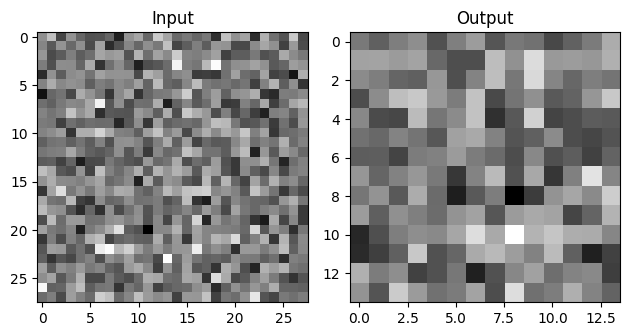

In [4]:
# Visualization
plt.subplot(1, 2, 1)
plt.imshow(input_data.squeeze(), cmap='gray')
plt.title('Input')

plt.subplot(1, 2, 2)
plt.imshow(output.squeeze()  # Remove a single-dimensional dimensions
           .detach()         # Detach the tensor from computation graph          
           .numpy()[0],      # Convert tensors to NumPy arrays
           cmap='gray')
plt.title('Output')

plt.tight_layout()
plt.show()

## 1.2. Basic 2

### Preparation

In [5]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torchvision import transforms

from PIL import Image

### Load Images

In [6]:
# Set an image path
image_path = './data/0630-surprised_cat.jpg'

# Load images
input_image = Image.open(image_path).convert('L')  # 'convert('L')': Convert to grayscale mode

# Change images to Tensor type
#input_data = torch.unsqueeze(torch.from_numpy(np.array(input_image)), dim = 1).float()
                        # 'np.array(input_image)': Convert a PIL image object to a NumPy array
                        # 'torch.from_numpy()': Create a PyTorch tensor from a NumPy array
                        # 'torch.unsqueeze(, dim=0)': Add a singleton dimension to the tensor at 'dim=0'
input_data = torch.unsqueeze(torch.from_numpy(np.array(input_image)), dim = 0).float().unsqueeze(dim=0)

### Set Convolutional Layers

In [7]:
# Define a convolutional layer
conv = nn.Conv2d(in_channels = 1,
                 out_channels = 1,
                 kernel_size = 3,
                 stride = 2)

# Get the result
output = conv(input_data)

print('Size of Input Data: ', input_data.shape)
print('Size of Output Data: ', output.shape)

Size of Input Data:  torch.Size([1, 1, 183, 275])
Size of Output Data:  torch.Size([1, 1, 91, 137])


### Visualization

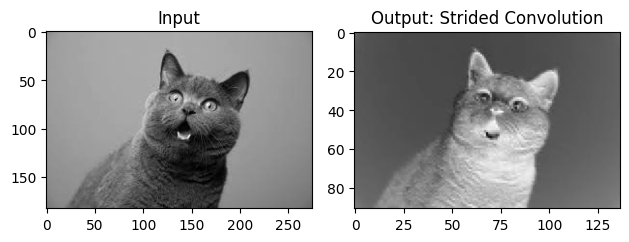

In [8]:
# Visualization
plt.subplot(1, 2, 1)
plt.imshow(input_data.squeeze().detach().numpy(), cmap='gray')
plt.title('Input')

plt.subplot(1, 2, 2)
plt.imshow(output.squeeze()  # Remove a single-dimensional dimensions
           .detach()         # Detach the tensor from computation graph          
           .numpy(),         # Convert tensors to NumPy arrays
           cmap='gray')
plt.title('Output: Strided Convolution')

plt.tight_layout()
plt.show()

# 2. Dilated Convolution (=Atrous Convolution)

- Dilated Convolution (=Atrous Convolution)
  - Space out kernel elements with gaps controlled by 'dilation rate'
  - 'Dilation Rate': Spaces between kernel elements
    - 'dilation=1': No gapts between elements
    - 'dilation=2': A single gap between kernel elements

## 2.1. Basic 1

### Preparation

In [9]:
# Import modules
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

### Generate Data

In [10]:
# Generate data
input_data = torch.randn(1,      # Batch size
                         1,      # Number of Channel
                         16, 16) # Size of images
print(input_data)

tensor([[[[-1.6672e+00, -7.4862e-01,  1.4539e+00, -8.1186e-01,  9.6527e-01,
            1.5567e+00,  2.7182e+00, -2.2494e+00,  1.2687e+00, -1.0180e+00,
           -1.8009e+00,  1.1502e+00, -2.7036e-01, -1.0164e+00,  7.8415e-01,
            4.9760e-02],
          [-4.7198e-01, -3.1843e-01, -7.1628e-01,  1.1336e-01,  2.1540e-01,
            1.0667e+00, -4.5435e-02, -1.6454e+00, -6.9138e-01, -1.9013e-01,
           -5.2395e-01,  1.9898e+00, -1.1639e+00, -2.5709e-01,  1.2294e+00,
            1.2085e+00],
          [-4.5625e-01, -4.5236e-01,  4.3713e-01,  1.0703e+00,  4.3317e-02,
           -1.0172e-01, -3.2966e-01, -3.1150e-01, -1.2764e+00,  8.8248e-01,
            1.3030e+00,  1.1255e+00, -6.8925e-01, -1.2497e+00, -1.0614e+00,
           -3.4901e-01],
          [-5.4517e-01,  5.7690e-01, -1.1743e+00,  1.8714e+00, -3.3853e-01,
           -1.1486e+00,  4.4757e-01,  5.9856e-01, -1.4154e-01, -1.0179e+00,
           -1.1728e+00, -7.7977e-01,  1.0826e+00,  2.3956e+00,  3.2524e-01,
            1

### Set Convolution Layers

In [11]:
# Define a convolution layer
conv = nn.Conv2d(in_channels = 1,
                out_channels = 1,
                kernel_size = 3,
                dilation = 2)    # Dilation Rate -> 'dilation=2': one zero-valued padding between elements of kernel

# Get the result
output = conv(input_data)

print('Size of Input Data: ', input_data.shape)
print('Size of Output Data: ', output.shape)

Size of Input Data:  torch.Size([1, 1, 16, 16])
Size of Output Data:  torch.Size([1, 1, 12, 12])


### Visualization

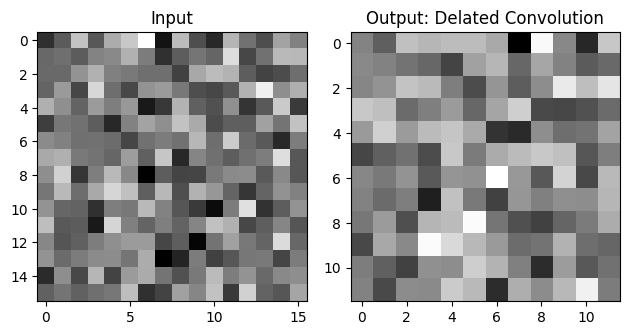

In [12]:
# Visualization
plt.subplot(1, 2, 1)
plt.imshow(input_data.squeeze(), cmap='gray')
plt.title('Input')

plt.subplot(1, 2, 2)
plt.imshow(output.squeeze().detach().numpy(), cmap='gray')
plt.title('Output: Delated Convolution')

plt.tight_layout()
plt.show()

## 2.2. Basic 2

### Preparation

In [13]:
# Import modules
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torchvision import transforms

from PIL import Image

### Load Images

In [14]:
# Set an image path
image_path = './data/0630-surprised_cat.jpg'

# Load an image
image = Image.open(image_path).convert('L')  # 'convert('L')': Convert to grayscale

# Convert to Tensor type
input_data = transforms.ToTensor()(image).unsqueeze(0)


### Set Convolutional Layers

In [15]:
# Define a convolutional layer
conv = nn.Conv2d(in_channels = 1,
                 out_channels = 1,
                 kernel_size = 3,
                 dilation = 2)      # Dilation Rate -> 'dilation=2': one zero-valued padding between elements of kernel

# Get the result
output = conv(input_data)

print('Size of Input Data: ', input_data.shape)
print('Size of Output Data: ', output.shape)

Size of Input Data:  torch.Size([1, 1, 183, 275])
Size of Output Data:  torch.Size([1, 1, 179, 271])


### Visualization

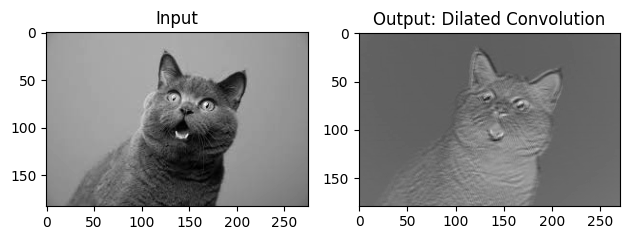

In [17]:
# Visualization
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Input')

plt.subplot(1, 2, 2)
plt.imshow(output.squeeze().detach().numpy(), cmap='gray')
plt.title('Output: Dilated Convolution')

plt.tight_layout()
plt.show()